# Convolutional AE con Keras

https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [6]:
# MODELO

# ENCODER
input_img = Input(shape=(32, 32, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same',use_bias = False)(input_img)
#x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same',use_bias = False)(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same',use_bias = False)(x)
#encoded = MaxPooling2D((2, 2), padding='same')(x)

# DECODER
x = Conv2D(64, (3, 3), activation='relu', padding='same',use_bias = False)(encoded)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same',use_bias = False)(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same',use_bias = False)(x)
#x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same',use_bias = False)(x)


In [7]:
opt = Adam(learning_rate=0.0001)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=opt, loss='mse')

In [8]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1728      
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        36864     
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36864     
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        36864     
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        36864     
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        3686

In [9]:
# DATOS
from keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

170498071/170498071 [==============================] - 2s 0us/step


In [10]:
x_train_noise = x_train + 0.1*np.random.randn(*x_train.shape)

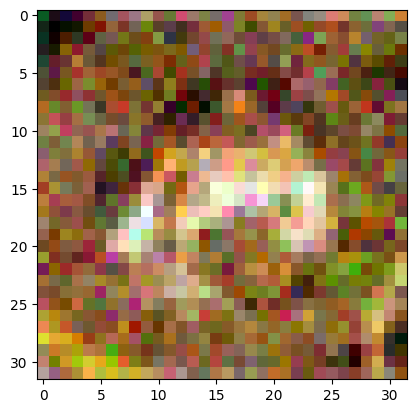

In [11]:
plt.imshow(x_train_noise[0],vmin=0,vmax=1)

In [12]:
# ENTRENAMIENTO
hist = autoencoder.fit(x_train_noise, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_split = 0.1)

Epoch 1/100
391/391 [==============================] - 23s 44ms/step - loss: 0.0179 - val_loss: 0.0513
Epoch 2/100
391/391 [==============================] - 16s 41ms/step - loss: 0.0056 - val_loss: 0.0682
Epoch 3/100
391/391 [==============================] - 16s 41ms/step - loss: 0.0044 - val_loss: 0.0757
Epoch 4/100
391/391 [==============================] - 16s 41ms/step - loss: 0.0040 - val_loss: 0.0796
Epoch 5/100
391/391 [==============================] - 16s 41ms/step - loss: 0.0037 - val_loss: 0.0853
Epoch 6/100
391/391 [==============================] - 16s 42ms/step - loss: 0.0035 - val_loss: 0.0823
Epoch 7/100
391/391 [==============================] - 16s 42ms/step - loss: 0.0034 - val_loss: 0.0913
Epoch 8/100
391/391 [==============================] - 16s 41ms/step - loss: 0.0033 - val_loss: 0.0905
Epoch 9/100
391/391 [==============================] - 16s 42ms/step - loss: 0.0032 - val_loss: 0.0947
Epoch 10/100
391/391 [==============================] - 16s 41ms/step - l

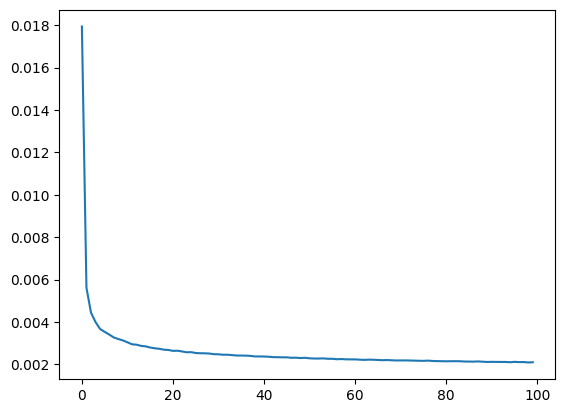

In [13]:
plt.plot(hist.history['loss'])

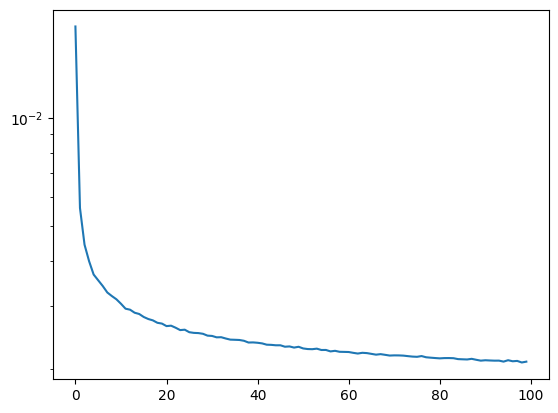

In [14]:
plt.semilogy(hist.history['loss'])

In [15]:
# TEST
x_test_noise = x_test + 0.1*np.random.randn(*x_test.shape)

decoded_imgs = autoencoder.predict(x_test_noise)

313/313 [==============================] - 2s 4ms/step


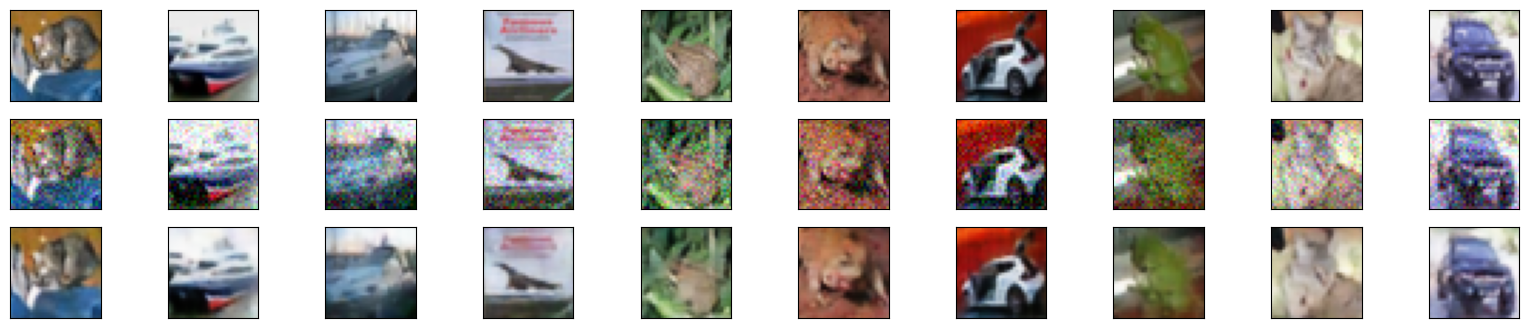

In [17]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i],vmin=0,vmax=1)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noise[i],vmin=0,vmax=1)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruccion
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i],vmin=0,vmax=1)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Limpiar ruido puro

In [28]:
x_noise = 0.01*x_test[0:1] + 0.1*np.random.randn(*x_test[0:1].shape)+0.5

x_denoise = autoencoder.predict(x_noise)

1/1 [==============================] - 0s 18ms/step


In [29]:
x_noise.max()

0.8898198700290472

In [30]:
x_noise.min()

0.16751402531475268

(-0.5, 31.5, 31.5, -0.5)

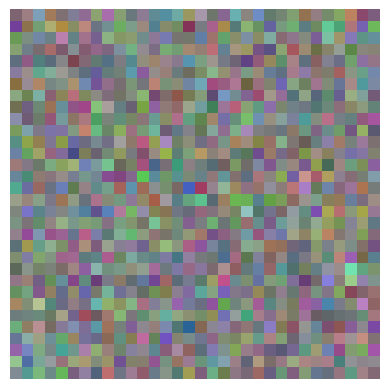

In [31]:
plt.imshow(x_noise[0],vmin=0,vmax=1)
plt.axis('off')

(-0.5, 31.5, 31.5, -0.5)

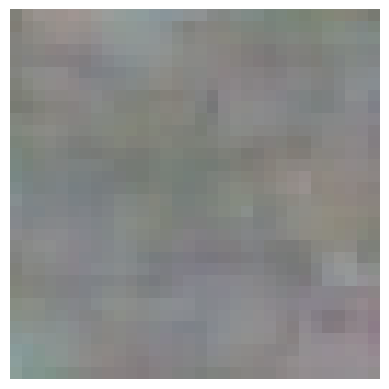

In [32]:
plt.imshow(x_denoise[0],vmin=0,vmax=1)
plt.axis('off')

In [33]:
x_interm = 0.5*x_denoise + 0.5*x_noise

(-0.5, 31.5, 31.5, -0.5)

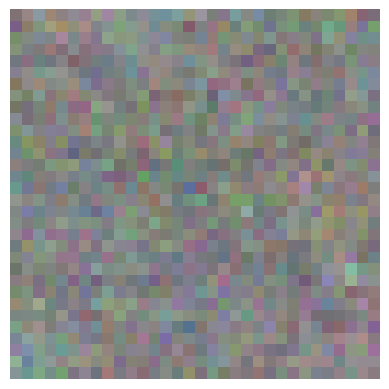

In [35]:
plt.imshow(x_interm[0],vmin=0,vmax=1)
plt.axis('off')

In [1]:

# cantidad de ruido total con la que empiezo
sigma_total = 0.2
x_noise = 0.01*x_test[0:1] + sigma_total*np.random.randn(*x_test[0:1].shape)+0.5

x_interm = x_noise.copy()


# Esto es 1 - alpha (alpha es el learnin rate)
beta = 0.9

# El ruido que quita el AE en cada paso (lo hemos entrenado con esta cantidad de ruido)
sigma_ruido = 0.1
# ruido que meto en cada paso
gamma = 0.001
# el ruido efectivo que quito en cada paso
# el ruido que quita el autoencoder en un paso multiplicado por mi learning rate
# menos el ruido que meto en cada paso
ruido_que_quito = sigma_ruido*(1-beta)-gamma

# Numero total de pasos que tengo que dar para eliminar todo el ruido
N_pasos = int(np.round(sigma_total/ruido_que_quito))

for n in range(0,N_pasos):

    x_denoise = autoencoder.predict(x_interm)
    x_interm = (1-beta)*x_denoise + beta*x_interm + gamma*np.random.randn(*x_test[0:1].shape)

    x_interm = (1+ruido_que_quito)*(x_interm-0.5)+0.5

    plt.imshow(x_interm[0],vmin=0,vmax=1)
    plt.axis('off')
    plt.show()


NameError: name 'x_test' is not defined